In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn as sk
import statsmodels.api as sm
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_excel('C:/Users/ASUS/Desktop/Hector/mid_camp/mid_camp/creditcardmarketing.xlsx')

In [3]:
data.columns=data.columns.str.lower().str.replace(' ', '_')
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
#_bank_accounts_open     0
overdraft_protection     0
credit_rating            0
#_credit_cards_held      0
#_homes_owned            0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [4]:
#Cleanning data

In [5]:
data = data.dropna()

In [6]:
data = data.drop('customer_number', axis = 1)

In [7]:
data = data.dropna()

In [8]:
data = data.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis =1)

In [9]:
data['#_bank_accounts_open'] = data['#_bank_accounts_open'].astype(str)
data['#_credit_cards_held'] = data['#_credit_cards_held'].astype(str)
data['#_homes_owned'] = data['#_homes_owned'].astype(str)
data['household_size'] = data['household_size'].astype(str)
data['own_your_home'] = data['own_your_home'].astype(str)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11160\3732380579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_balance'])


<Axes: xlabel='average_balance', ylabel='Density'>

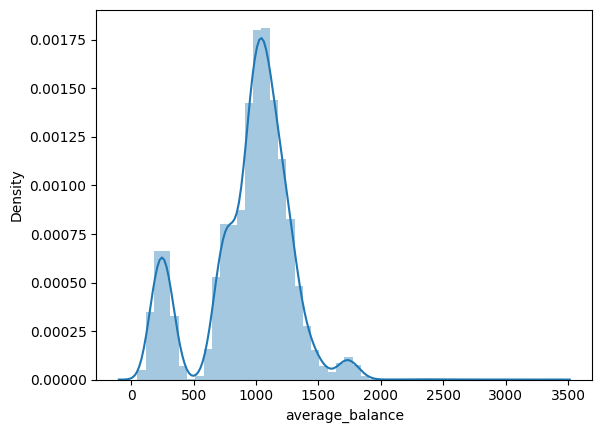

In [10]:
sns.distplot(data['average_balance'])

In [11]:
data['average_balance'] = np.log(data['average_balance'] + 1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11160\3732380579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_balance'])


<Axes: xlabel='average_balance', ylabel='Density'>

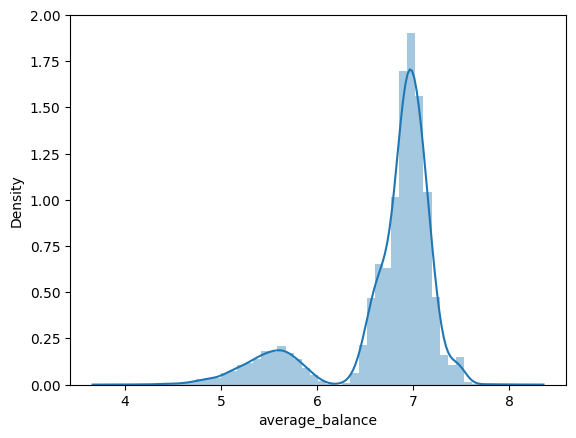

In [12]:
sns.distplot(data['average_balance'])

In [13]:
q1= np.percentile(data['average_balance'], 25)
q3 = np.percentile(data['average_balance'], 75)
iqr = q3-q1
lower_limit = q1 - 1.5*iqr 
upper_limit = q3 + 1.5*iqr
data = data[(data['average_balance'] > lower_limit) & (data['average_balance'] < upper_limit)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11160\3732380579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_balance'])


<Axes: xlabel='average_balance', ylabel='Density'>

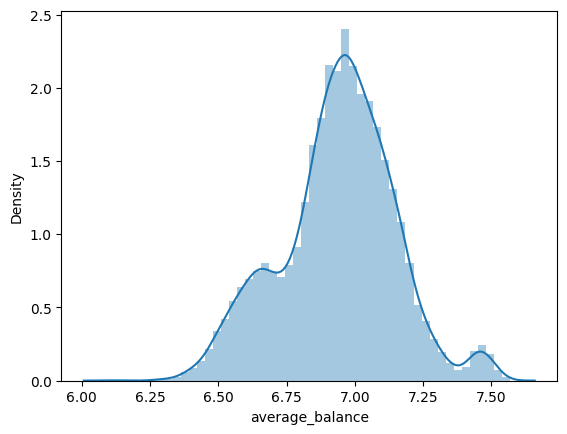

In [14]:
sns.distplot(data['average_balance'])

In [15]:
categorical= data.select_dtypes(include='object')

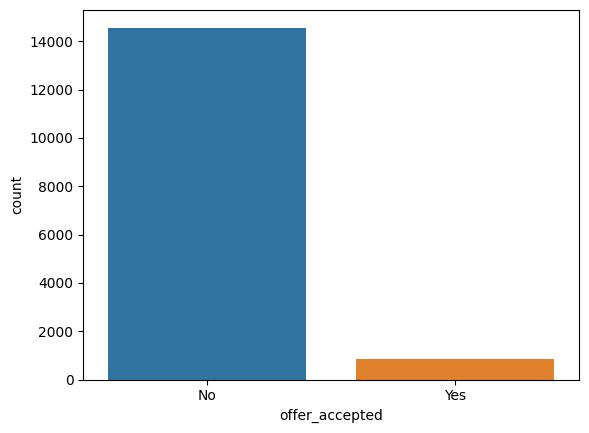

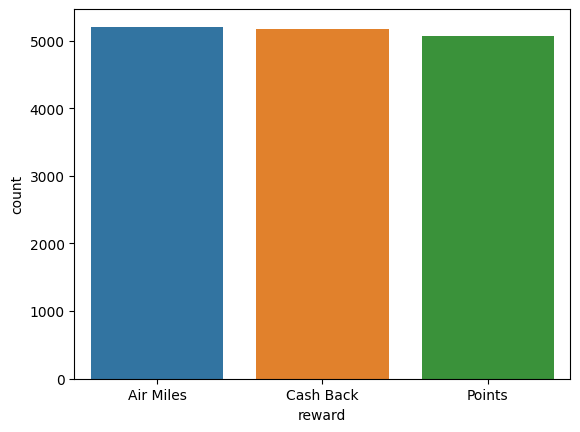

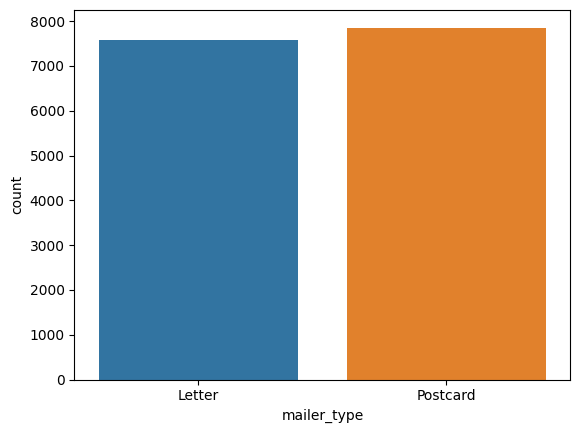

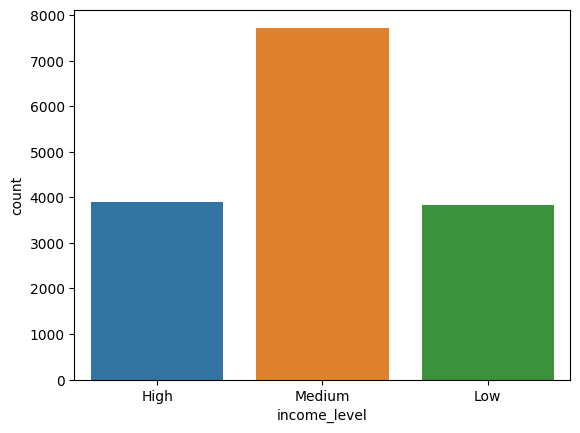

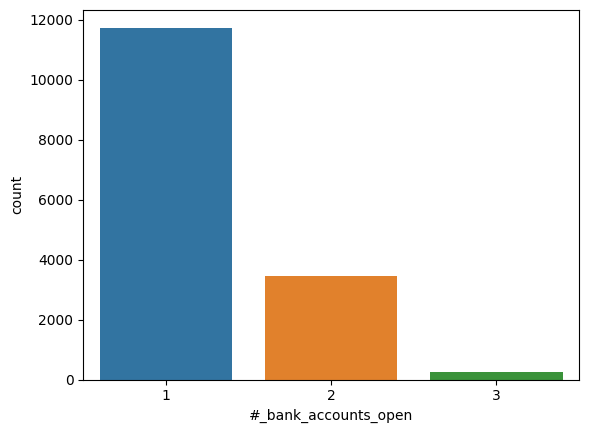

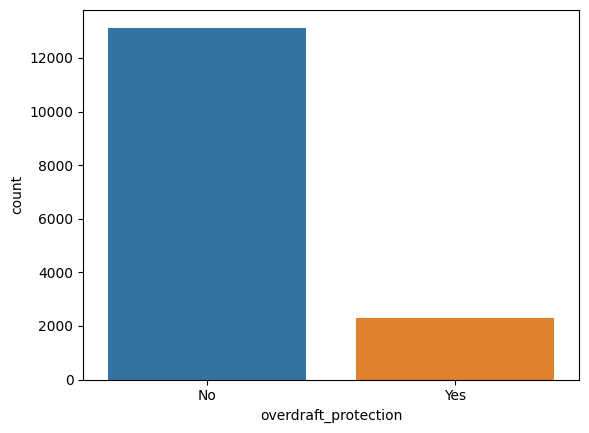

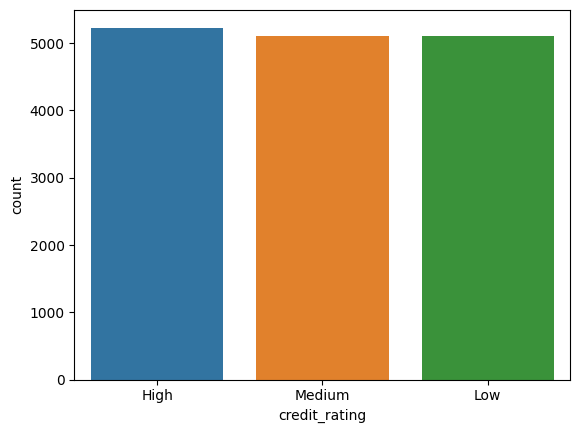

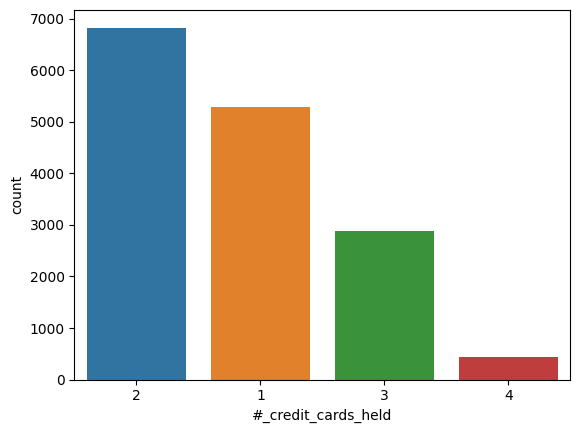

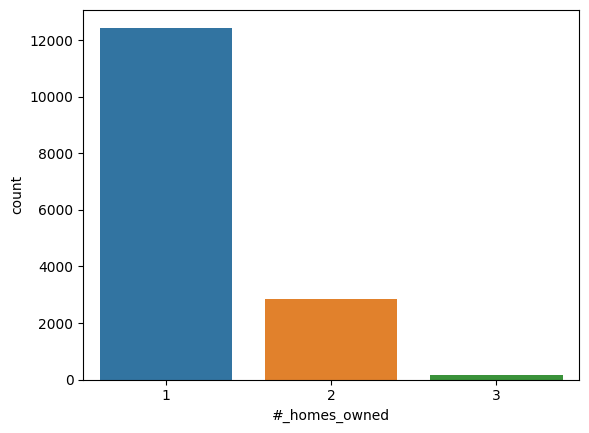

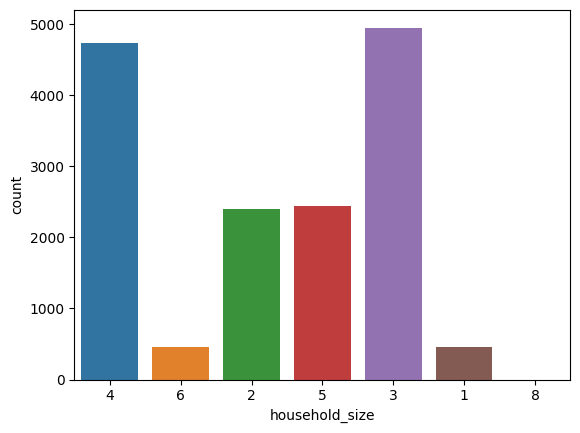

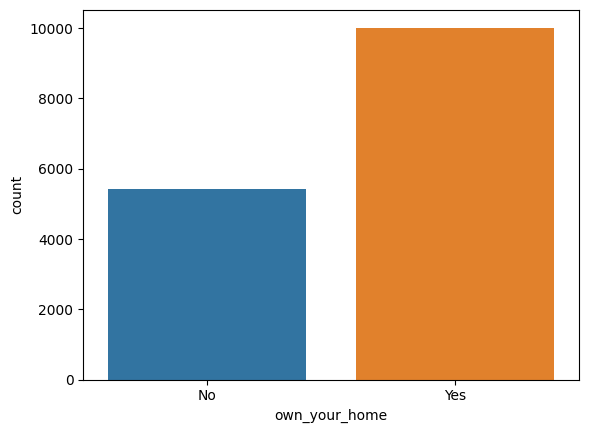

In [16]:
for i in categorical.columns:
    sns.countplot(data = categorical, x = i)
    plt.show()

In [17]:
data['#_bank_accounts_open'] = data['#_bank_accounts_open'].replace('3', '2')
data['#_bank_accounts_open'] = data['#_bank_accounts_open'].replace('2', 'more than 1')

In [18]:
data['#_credit_cards_held'] = data['#_credit_cards_held'].replace('4', '3')
data['#_credit_cards_held'] = data['#_credit_cards_held'].replace('3', 'more than 2')

In [19]:
data['#_homes_owned'] = data['#_homes_owned'].replace('3', '2')
data['#_homes_owned'] = data['#_homes_owned'].replace('2', 'more than 1')

In [20]:
data = data[data['household_size']!= '8'].reset_index(drop=True)

In [21]:
nos = data[data['offer_accepted']== 'No'].reset_index(drop = True)
nos.shape

(14565, 12)

In [22]:
yes = data[data['offer_accepted']== 'Yes'].reset_index(drop = True)

In [23]:
yes = yes.sample(14566, replace = True).reset_index(drop = True)
yes.shape

(14566, 12)

In [24]:
df = pd.concat([nos, yes], axis = 0).reset_index(drop=True)

In [25]:
numerical = df.select_dtypes(include='number')
categorical= df.select_dtypes(include='object')

In [26]:
y = df['offer_accepted']

In [27]:
categorical = categorical.drop('offer_accepted', axis = 1)
encoded= pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categorical).toarray())

In [28]:
scaled= pd.DataFrame(StandardScaler().fit_transform(numerical))
scaled

,0
0,0.576643
1,0.814163
2,0.782222
3,0.380501
4,-0.122202
...,...
29126,-1.586917
29127,-0.213543
29128,-0.264212
29129,-0.443904


In [36]:
final = pd.concat([encoded, scaled], axis=1)

In [37]:
x_train, x_test, y_train, y_test= train_test_split(final , y , test_size=.15)

In [48]:
lr= LogisticRegression()
lr = lr.fit(x_train, y_train)
prediction=lr.predict(x_test)
prediction

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [49]:
cm =confusion_matrix(y_test, prediction, labels = lr.classes_)
cm

array([[1488,  711],
       [ 574, 1597]], dtype=int64)

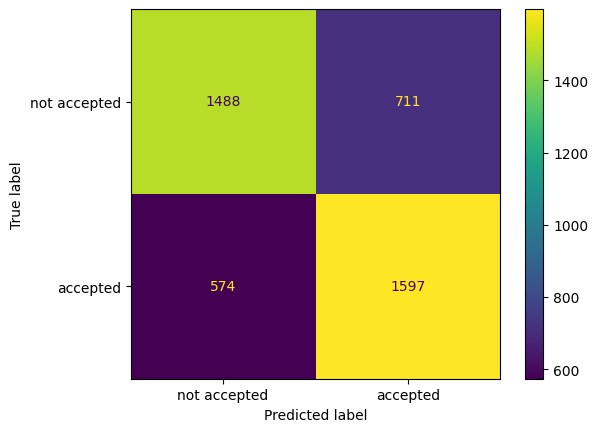

In [50]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['not accepted', 'accepted'])
cm_disp.plot()

In [51]:
accuracy_score(y_test, prediction)

0.7059496567505721

In [ ]:
# ROC AUC - Linnear Regression

In [52]:
ecod = LabelEncoder().fit_transform(y_test)

In [53]:
y_probs = lr.predict_proba(x_test)[:,1]

In [54]:
fpr, tpr, threshold = roc_curve(ecod, y_probs, pos_label = 1)

In [55]:
roc_auc = auc(fpr, tpr)

In [56]:
roc_auc

0.7720648533974134

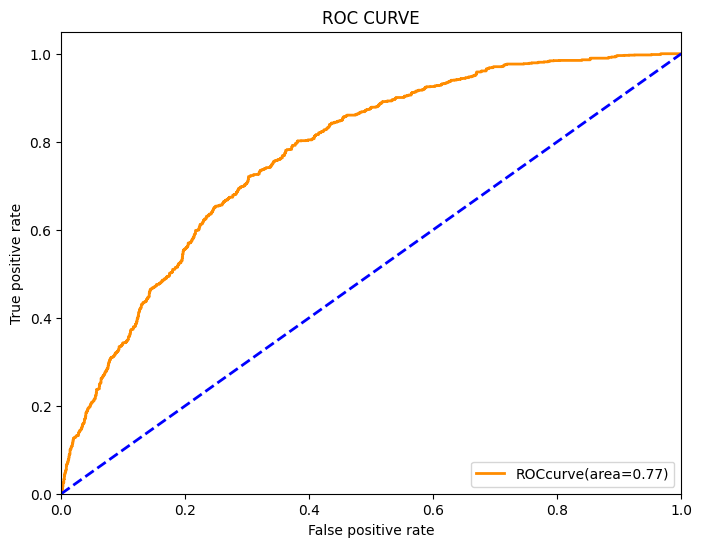

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw = 2, label=f'ROCcurve(area={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

In [58]:
#Finding K and implementing the KN-neighbors model

In [59]:
k = []
for i in range(780, 785, 1):
    k.append(i)
k_accuracy = []
for i in k:
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(x_train, y_train)
    k_accuracy.append(kn.score(x_test, y_test))

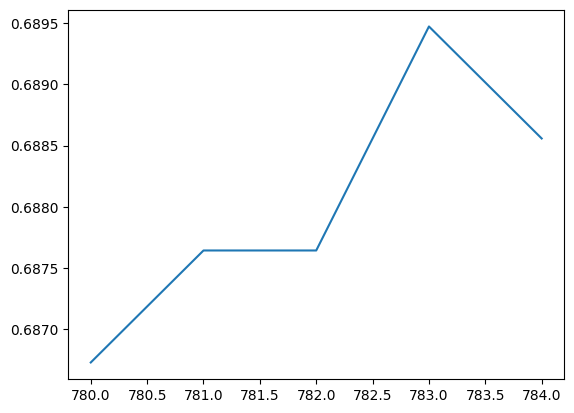

In [60]:
plt.plot(k, k_accuracy)

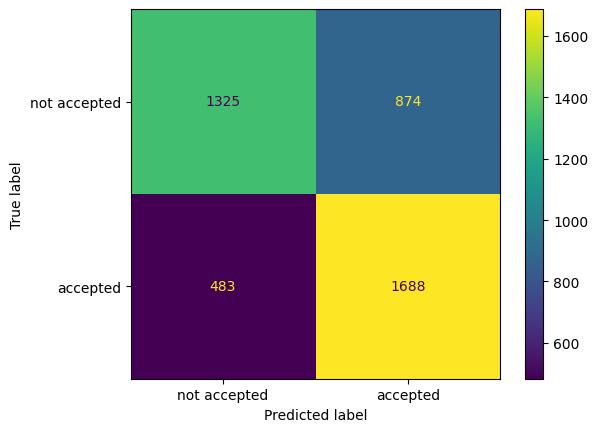

In [61]:
kn = KNeighborsClassifier(n_neighbors = 783)
kn.fit(x_train, y_train)
prediction = kn.predict(x_test)
cm =confusion_matrix(y_test, prediction, labels = kn.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['not accepted', 'accepted'])
cm_disp.plot()

In [62]:
accuracy_score(y_test, prediction)

0.6894736842105263

In [ ]:
# ROC AUC KN - NEIGHBORS

In [63]:
ecod = LabelEncoder().fit_transform(y_test)
y_prob = kn.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(ecod, y_prob, pos_label = 1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7576824522850616

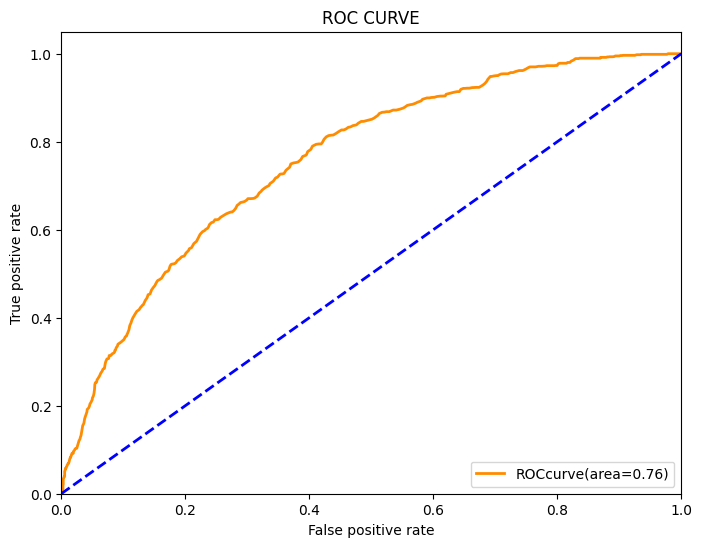

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw = 2, label=f'ROCcurve(area={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()